# King County Housing Price Prediction

## Overview
This project will utilize multiple regression analysis to predict housing prices in King County, WA. The training data will be explored for feature building and the final model will be built and trained by SciKit python library. The data and project scope was provide by Flatiron School for Data Science Immersive program phase 2 final project. 

## Business Problem
A Seattle real estate company seeks to increase porfolio in King County, WA and wants to accurately predict the sales price of a property. Having an accurate sales prediction will aid in strategizing the investment options to maximize their profit. A multiple linaer regression model will be built base on provided property data for this task. 

During the exploratory phase following questions will also be focused on:
1. What location in the county has the highest property value?
2. What aspects of the property brings value?
3. Do renovations have effect on property value?

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

## Library and Data Import

In [278]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import metrics
%matplotlib inline

In [378]:
kc_df = pd.read_csv("data/kc_house_data_train.csv", index_col=0)

## Exploratory Data Analysis

This section will seek to answer the questions listed in business problems. The data will be visualized for easy understanding and followed with appropriate statistical analysis for empirical findings within data. Following are the summaries of the questions answered in this section:

1. What neighborhood contains most valuable properties?
2. Does condition of the property affect the value?
    - Are the property age and condition related?
3. What features add value to the house?
    - Do renovation increase property value?
    - Do basements increase property value?

### Data Integrity and Description

First, the data will be checked for completeness and integrity. This will also provide an opportunity to quickly overview the data set and prepare the future steps. 

In [ ]:
pd.DatetimeIndex(dataframe['date']).month
dataframe['sale_year'] = pd.DatetimeIndex(dataframe['date']).year


In [5]:
total_null = 0 
for null_count in kc_df.isnull().sum():
    total_null += null_count
print(f"There are total {total_null} null values in the data")

There are total 0 null values in the data


The data is free of null values and will not require further data cleaning. 

### Data Structure
The data set contains mix of continuous and categorical values. They are separated by columns and below is a brief summary of each columns. 

#### Column Description
- **id** - unique ID for a house
- **date** - Date day house was sold
- **price** - Price is prediction target
- **bedrooms** - Number of bedrooms
- **bathrooms** - Number of bathrooms
- **sqft_living** - square footage of the home
- **sqft_lot** - square footage of the lot
- **floors** - Total floors (levels) in house
- **waterfront** - Whether house has a view to a waterfront
- **view** - Number of times house has been viewed
- **condition** - How good the condition is (overall)
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house (apart from basement)
- **sqft_basement** - square footage of the basement
- **yr_built** - Year when house was built
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip code in which house is located
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

Given that many columns contain categorical values that are not pertinent to basic statistical analysis, only few will be chosen for brief overlook of the data.

In [6]:
summary_features = ["price", "yr_built", "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
                    "floors", "condition", "grade", "sqft_living15", "sqft_lot15"]

In [7]:
kc_df[summary_features].describe()

,price,yr_built,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,1970.792019,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,3.408502,7.654425,1987.986698,12873.475824
std,3.733190e+05,29.343516,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.651296,1.174718,684.802635,27227.437583
min,7.500000e+04,1900.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,1.000000,1.000000,399.000000,659.000000
25%,3.210000e+05,1951.000000,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,3.000000,7.000000,1490.000000,5111.250000
50%,4.500000e+05,1974.000000,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,3.000000,7.000000,1840.000000,7622.500000
75%,6.450000e+05,1996.000000,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,4.000000,8.000000,2360.000000,10101.750000
max,7.700000e+06,2015.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,6210.000000,858132.000000


#### Column Analysis (summary_features)
- **price** - Price has a large gap of 2 magnitude. Further analysis will be required especially against the sale date. 
- **yr_built** - The data set contains builds built from 1900 to 2015.
- **bedrooms** - 0 bedrooms indicate studio apartment, most homes contain 4 or less bedrooms with some extreme outliers.
- **bathrooms** - Surprising to find that there are homes with 0 bathrooms. Most seem to have at least a 3/4 bathroom. 
- **sqft_living** - Living area also varies greatly from a small apartments to mansions. 
- **sqft_lot** - Similar to sqft_living above.
- **floors** - There are half floors to account for, which are top levels that do not spand the entirity of the house. 
- **condition** - Average properties sold are sold at 3.4 (may require superficial repair).
- **grade** - Average grade given in King County is 7, which means average properties are sold in slightly above average grade. 
- **sqft_living15** - The neighboring properties tend to be similar in sizes (similar trend to sqft_lving)
- **sqft_lot15** - Similar to sqft_living15 above

### Property Value by Zipcode

What neighborhood contains most valuable properties?
<br>
Analyzing the average property values per zipcode results in Medina, Belleve, Mercer Island, Madison Park, and Capitol Hill area to be neighborhood with the highest average property values. Most properties in these neighborhood doubles the average property value of King County with average property value of Medina **quadrupling** that of King County. It seems that the proximity to the Lake Washington and large parks are driving the value of these properties higher. 

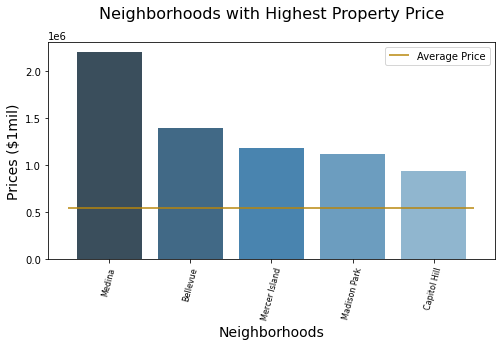

In [8]:
#property values by zipcode calculation
kc_top5_price = kc_df.groupby("zipcode")["price"].mean().sort_values(ascending = False)[:5]
kc_mean_price = kc_df.price.mean()
#top5 neighborhood label for plot
area_labels = ["Medina", "Bellevue", "Mercer Island", 
               "Madison Park", "Capitol Hill"]

#plotting the data
plt.subplots(figsize=(8,4))
sns.barplot(x=kc_top5_price.index, y=kc_top5_price, order=kc_top5_price.index, palette="Blues_d") #blue for seahawks!
plt.xticks(np.arange(5), area_labels, rotation=75, size=8) #relabel x with list above
plt.hlines(kc_mean_price, -.5 ,4.5, colors="darkgoldenrod", label="Average Price") #plot average price horizontal line

#prettify graph
plt.xlabel("Neighborhoods", size=14)
plt.ylabel("Prices ($1mil)", size=14)
plt.title("Neighborhoods with Highest Property Price", size=16, y=1.08)
plt.legend() #show legend

#uncomment line below to export image
plt.savefig("images/high_price_neighborhood.png",bbox_inches = "tight")
plt.show();

#### ANOVA of Property Prices using Top 5 Neighborhoods

In [203]:
alpha = 0.05 
#ANOVA Test Setup
kc_top5 = kc_df[kc_df.zipcode.isin(kc_top5_price.index)]
formula = 'price~C(zipcode)'
lm_top5 = smf.ols(formula, kc_top5).fit()
anova_top5_table = sm.stats.anova_lm(lm_top5, typ=2)

if anova_top5_table["PR(>F)"][0] < alpha:
    print("Top 5 ranked zipcode have a statistically significant impact on average property value")
    print("Zipcdoe ANOVA F-statisic Probability: ", anova_condition["PR(>F)"][0])

Top 5 ranked zipcode have a statistically significant impact on average property value
Zipcdoe ANOVA F-statisic Probability:  6.813536869407728e-24


Findings above

In [413]:
kc_df.zipcode.unique()

array([98058, 98115, 98006, 98034, 98052, 98031, 98007, 98199, 98027,
       98119, 98122, 98155, 98055, 98118, 98014, 98059, 98004, 98053,
       98072, 98133, 98092, 98074, 98125, 98045, 98106, 98022, 98177,
       98008, 98002, 98040, 98029, 98042, 98001, 98065, 98056, 98144,
       98188, 98109, 98010, 98075, 98198, 98030, 98105, 98023, 98028,
       98112, 98038, 98116, 98103, 98178, 98168, 98005, 98077, 98146,
       98011, 98126, 98108, 98136, 98033, 98003, 98117, 98107, 98019,
       98102, 98032, 98148, 98166, 98070, 98024, 98039], dtype=int64)

#### ADD FOLIUM MAP SCATTER THING HERE

<AxesSubplot:xlabel='zipcode', ylabel='price'>

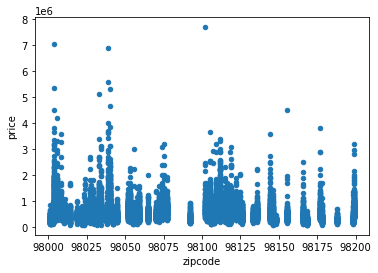

In [399]:
kc_df.plot(kind="scatter", x="zipcode", y="price")

### Does Condition Affect Property Value

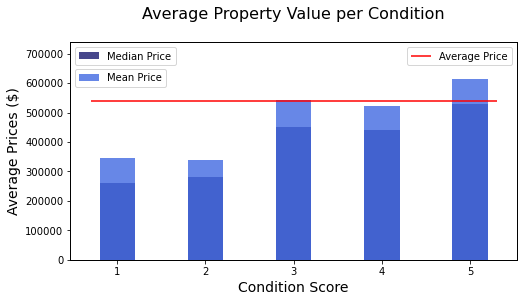

In [122]:
#-------------------Conditions Calculation--------------------------------#
condition_mean = kc_df.groupby("condition")["price"].mean()
condition_median = kc_df.groupby("condition")["price"].median()
condition_score = np.arange(1,6)

#--------------------------Bar Plots--------------------------------------#
#set subplot data
fig, ax = plt.subplots(figsize=(8,4))
ax2 = ax.twinx() #set ax2 on same x axis as ax
ax3 = ax.twinx() #same as above, for hline

#barplots 
ax.bar(x=condition_score, height=condition_median, width=width,
       label="Median Price", color="midnightblue", alpha=0.8)
ax2.bar(x=condition_score, height=condition_mean, width=width,
        label="Mean Price", color="royalblue", alpha=0.8)

#horizontal line for mean price
ax3.hlines(kc_mean_price, .7 ,5.3, colors="red", label="Average Price")

#set ylimit to the same scale and display only 1
ax.set_ylim(0,1.2*condition_mean.max())
ax2.set_ylim(0,1.2*condition_mean.max())
ax3.set_ylim(0,1.2*condition_mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)

#set legend positions
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")

#prettify graph
ax.set_ylabel("Average Prices ($)", size=14)
ax.set_xlabel("Condition Score", size=14)
plt.title("Average Property Value per Condition", size=16, y=1.08)

#uncomment line below to export image
plt.savefig("images/condition_value.png",bbox_inches = "tight")
plt.legend()
plt.show();

#### ANOVA of Property Prices using Conditions

In [179]:
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(condition)'
lm_condition = smf.ols(formula, kc_df).fit()
anova_condition = sm.stats.anova_lm(lm_condition, typ=2)

if anova_condition["PR(>F)"][0] < alpha:
    print("The property condition have a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

The property condition have a statistically significant impact on average property value
Conditions F-statisic Probability:  6.813536869407728e-24


Findings above

### What features of the house add value to the house?

Does a house having a basement add value to the house?

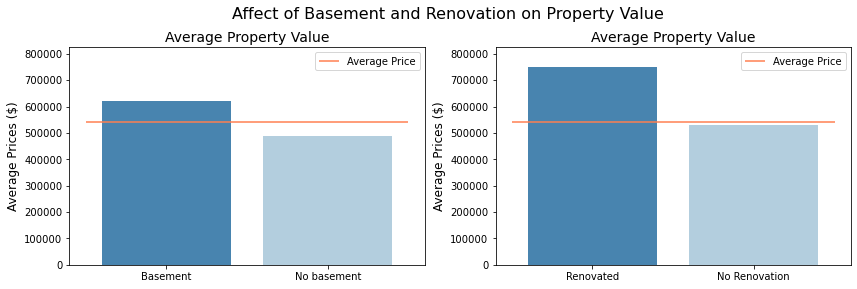

In [155]:
#--------------------------Property Feature Calculation---------------------------------------#
basement = kc_df[(kc_df["sqft_basement"] > 0)]
basement_mean = basement.price.mean()
no_basement = kc_df[(kc_df["sqft_basement"] == 0)]
no_basement_mean = no_basement.price.mean()

#mean values to plot
renovated = kc_df[(kc_df["yr_renovated"] > 0)]
renovated_mean = renovated.price.mean()
not_renovated = kc_df[(kc_df["yr_renovated"] == 0)]
not_renovated_mean = not_renovated.price.mean()

#prepare plot labels
label_basement = ["Basement", "No basement"]
values_basement = [basement_mean, no_basement_mean]
label_renovation = ["Renovated", "No Renovation"]
values_renovation = [renovated_mean, not_renovated_mean]

#--------------------------Bar Plots--------------------------------------#
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.barplot(ax=ax[0], x=label_basement, y=values_basement, palette="Blues_r")
sns.barplot(ax=ax[1], x=label_renovation, y=values_renovation, palette="Blues_r")
ax[0].hlines(kc_mean_price, -.5 ,1.5, colors="coral", label="Average Price") #plot average price horizontal line
ax[1].hlines(kc_mean_price, -.5 ,1.5, colors="coral", label="Average Price") #plot average price horizontal line

#prettify graph
ax[0].set_ylabel("Average Prices ($)", size=12)
ax[0].set_title("Average Property Value", size=14)
ax[0].set_ylim(0,1.1*renovated_mean)
ax[0].legend()

ax[1].set_ylabel("Average Prices ($)", size=12)
ax[1].set_title("Average Property Value", size=14)
ax[1].set_ylim(0,1.1*renovated_mean)
ax[1].legend()

plt.suptitle("Affect of Basement and Renovation on Property Value", size=16, y=1.02)

#uncomment below to export image
plt.savefig("images/basement_renovation_value.png",bbox_inches = "tight")
plt.show();

#### Property Features Statistical Analysis

$\alpha$ = 0.05

**Basement** <Br>
Null-Hypothesis: There are no significant difference in average property value between properties with or without basements. <Br>
Alternative Hypothesis: There no significant difference in average property value between properties with or without basements. 
<Br>
    
**Renovation** <Br>
Null-Hypothesis: There are no significant difference in average property value between properties with or without renovation. 
<Br>
Alternative Hypothesis: There no significant difference in average property value between properties with or without renovation. 

In [181]:
alpha = 0.05
basement_p_val = stats.ttest_ind(basement.price, no_basement.price, equal_var=False)[1]
print("Basement vs No Basement T-test P Value: ", basement_p_val)
if basement_p_val < alpha:
    print("The P value is less than alpha, reject null-hypothesis")

print("\n") #white space for formatting output

renovation_p_val = stats.ttest_ind(renovated.price, not_renovated.price, equal_var=False)[1]
print("Renovated vs Not Renovated T-test P Value: ", renovation_p_val)
if renovation_p_val < alpha:
    print("The P value is less than alpha, reject null-hypothesis")

Basement vs No Basement T-test P Value:  1.935598808013724e-102
The P value is less than alpha, reject null-hypothesis


Renovated vs Not Renovated T-test P Value:  6.478917377975333e-20
The P value is less than alpha, reject null-hypothesis


Findings above

### EDA Summary

1. What neighborhood contains most valuable properties?
    - Medina, Belleve, Mercer Island, Madison Park, and Capitol Hill neighborhood in King County have highest average property values. The property values of these areas have statistically significant differences from the King County average property values. 
    

2. Does condition of the property affect the value?
    - Conditions of the property have statistically significant effects on the property value. However, the average value of condition 4/5 was less than the condition of 3/5. This could be due to other factors such as apartments/co-ops, which may have lower price per property, but tends to be better maintained than a private home. 


3. What features add value to the house?
    - A renovated property have higher value than a non-renovated property.
    - Basements add significant value to the property.

### Correlation Check and Preliminiary Linear Regression

Is this section necessary? Do I want to keep this section?

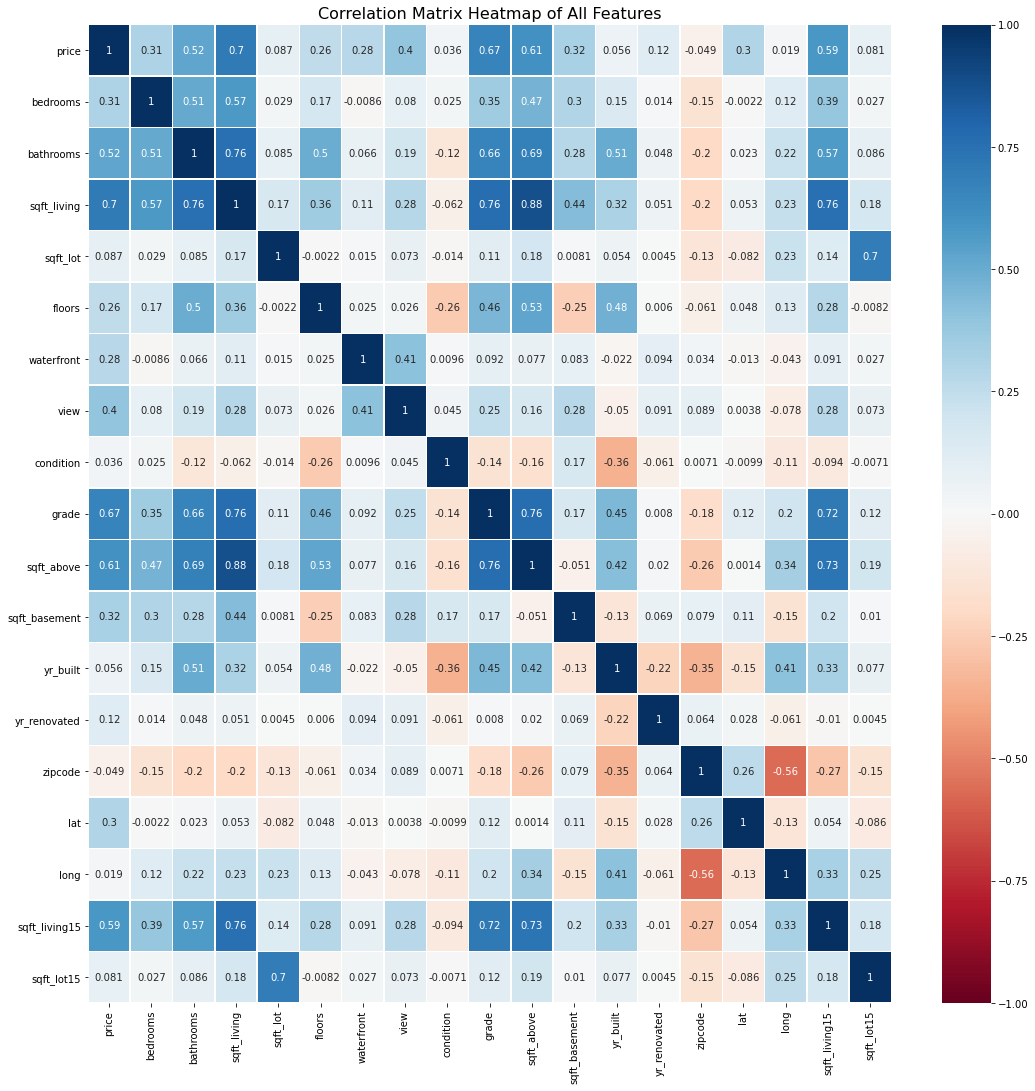

In [161]:
plt.subplots(figsize=(18,18))
sns.heatmap(kc_df.iloc[:,1:].corr(), annot=True, linewidths=.5, cmap="RdBu", vmin = -1, vmax=1)
plt.title("Correlation Matrix Heatmap of All Features", size=16);

### Preliminary Mulitple Linear Regression
Using the correlation matrix heatmap above it can be seen that `sqft_living`, `grade`, and `sqft_lving15` have highest correlation to the price. However, given that they are also highly correlated with `sqft_lving` only `sqft_lving` used among them. Also, `bedrooms` and `floors` also have slight positive correlation to the price and do not have high correlation (0.7 or above) between them or `sqft_living`. Therefore, a simple multiple linear regression will be made using `statsmodel` to set a baseline for future linear regression model. 

In [182]:
pre_mlr = smf.ols(formula="price~sqft_living+C(zipcode)+condition+sqft_basement", data=kc_df).fit()
pre_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     649.6
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:42:38   Log-Likelihood:            -2.3502e+05
No. Observations:               17290   AIC:                         4.702e+05
Df Residuals:                   17217   BIC:                         4.707e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.244e+05   1.47e+04    -22.122      0.000   -3.53e+05   -2.96e+05
C(zipcode)[T.98002]  9471.9243   1.93e+04      0.490      0.624   -2.84e+04    4.74e+04
C(zipcode)[T.98003]  2453.0243   1.73e+04      0.141      0.888   -3.15e+04    3.64e+04
C(zipcode)[T.98004]  8.381e+05   1.72e+04     48.765      0.000    8.04e+05    8.72e+05
C(zipcode)[T.98005]  3.239e+05   2.01e+04     16.107      0.000    2.85e+05    3.63e+05
C(zipcode)[T.98006]  3.186e+05   1.53e+04     20.815      0.000    2.89e+05    3.49e+05
C(zipcode)[T.98007]   2.61e+05    2.1e+04     12.416      0.000     2.2e+05    3.02e+05
C(zipcode)[T.98008]  3.014e+05   1.73e+04     17.390      0.000    2.67e+05    3.35e+05
C(zipcode)[T.98010]  6.228e+04   2.53e+04      2.458      0.014    1.26e+04    1.12e+05
C(zipcode)[T.98011]  1.249e+05   1.91e+04      6.545      0.000    8.75e+04    1.62e+05
C(zipcode)[T.98014]   1.19e+05   2.25e+04      5.291      0.000    7.49e+04    1.63e+05
C(zipcode)[T.98019]   6.92e+04   1.98e+04      3.490      0.000    3.03e+04    1.08e+05
C(zipcode)[T.98022]  3.495e+04   1.82e+04      1.916      0.055    -803.890    7.07e+04
C(zipcode)[T.98023]  -1.54e+04    1.5e+04     -1.028      0.304   -4.48e+04     1.4e+04
C(zipcode)[T.98024]  1.832e+05   2.67e+04      6.862      0.000    1.31e+05    2.36e+05
C(zipcode)[T.98027]  1.773e+05   1.57e+04     11.281      0.000    1.47e+05    2.08e+05
C(zipcode)[T.98028]  1.333e+05   1.75e+04      7.634      0.000    9.91e+04    1.68e+05
C(zipcode)[T.98029]   2.23e+05   1.69e+04     13.226      0.000     1.9e+05    2.56e+05
C(zipcode)[T.98030] -5904.4878   1.79e+04     -0.330      0.741    -4.1e+04    2.92e+04
C(zipcode)[T.98031]  2145.9084   1.75e+04      0.122      0.903   -3.23e+04    3.65e+04
C(zipcode)[T.98032]  2.095e+04   2.23e+04      0.938      0.348   -2.28e+04    6.47e+04
C(zipcode)[T.98033]  3.896e+05   1.55e+04     25.172      0.000    3.59e+05     4.2e+05
C(zipcode)[T.98034]  2.285e+05   1.48e+04     15.427      0.000    1.99e+05    2.58e+05
C(zipcode)[T.98038]  1.322e+04   1.47e+04      0.900      0.368   -1.56e+04     4.2e+04
C(zipcode)[T.98039]  1.398e+06   3.23e+04     43.315      0.000    1.34e+06    1.46e+06
C(zipcode)[T.98040]  5.939e+05   1.74e+04     34.127      0.000     5.6e+05    6.28e+05
C(zipcode)[T.98042]  1956.7939   1.49e+04      0.131      0.896   -2.72e+04    3.12e+04
C(zipcode)[T.98045]  1.177e+05   1.86e+04      6.321      0.000    8.12e+04    1.54e+05
C(zipcode)[T.98052]  2.398e+05   1.46e+04     16.441      0.000    2.11e+05    2.68e+05
C(zipcode)[T.98053]  1.994e+05   1.59e+04     12.565      0.000    1.68e+05    2.31e+05
C(zipcode)[T.98055]  5.209e+04   1.77e+04      2.949      0.003    1.75e+04    8.67e+04
C(zipcode)[T.98056]  9.749e+04   1.57e+04      6.221      0.000    6.68e+04    1.28e+05
C(z

This model performs decently for a simple model with adjusted R-squred value of 0.527. Future model will use this as the baseline for its performance comparison. Also indicated by summary messages there are some multicolinearity concerns with this model and this is also indicated between sqft_living and bedroom's correlation value of 0.57 from the correlation matrix heatmap. Some bedroom categories also contain p-values higher than typcial alpha (a=0.05), so this feature will be explored further feature engineering to improve the model performance. 

## Feature Engineering

### Renovation

In [379]:
kc_df["renovated"] = kc_df.yr_renovated.apply(lambda x: 1 if x > 0 else 0)

### Renovation Age
This feature could be a good candidate to make a negatively correlated feature. 

In [380]:
kc_df["renovation_age"] = kc_df.yr_renovated.apply(lambda x: 2020-x if x > 0 else 0)

### Master Bathroom

Properties with 2 or more bathrooms are most likely to contain a master bathroom, which is highly desirable to many buyers. It is not a gaurantee that a property with 2 bathrooms have a master bathroom. However, given that bathroom is a highly correlated column to prices and contain multiple colinearity between other features it could be a good candidate for feature engineering.

In [381]:
kc_df["master_bathroom"] = kc_df.bathrooms.apply(lambda x: 1 if x > 2 else 0)

### Sold Year and Sold Quarter

In [383]:
kc_df["sale_year"] = kc_df.date.apply(lambda x: int(x[:4])) #convert first 4 character, year, into int
kc_df["sale_quarter"] = kc_df.date.apply(lambda x: int(x[4:6])//3.1 + 1) #fancy math convert month, 4-5 index, to quarters in int

#### Feature Check
All features should be float or integer before going to engineering. Date, id, and price column will be eliminated before being added to Sklearn linear regression training. 

In [384]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,renovation_age,master_bathroom,sale_year,sale_quarter
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,98058,47.4388,-122.162,2390,7700,0,0,1,2014,4.0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,98115,47.6784,-122.285,2370,6283,0,0,1,2014,3.0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,98006,47.5646,-122.129,3710,9685,0,0,1,2014,3.0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,98034,47.6995,-122.228,4050,14226,0,0,1,2015,1.0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,98052,47.6647,-122.083,2250,4050,0,0,1,2014,3.0


In [385]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               17290 non-null  int64  
 1   date             17290 non-null  object 
 2   price            17290 non-null  float64
 3   bedrooms         17290 non-null  int64  
 4   bathrooms        17290 non-null  float64
 5   sqft_living      17290 non-null  int64  
 6   sqft_lot         17290 non-null  int64  
 7   floors           17290 non-null  float64
 8   waterfront       17290 non-null  int64  
 9   view             17290 non-null  int64  
 10  condition        17290 non-null  int64  
 11  grade            17290 non-null  int64  
 12  sqft_above       17290 non-null  int64  
 13  sqft_basement    17290 non-null  int64  
 14  yr_built         17290 non-null  int64  
 15  yr_renovated     17290 non-null  int64  
 16  zipcode          17290 non-null  int64  
 17  lat         

## Linear Regression

### OLS

In [45]:
check1 = smf.ols(formula="price~sqft_living+sqft_basement+sqft_lot+C(renovated)", data=kc_df).fit()
check1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     4368.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:36:40   Log-Likelihood:            -2.4033e+05
No. Observations:               17290   AIC:                         4.807e+05
Df Residuals:                   17285   BIC:                         4.807e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -5.48e+04   5011.690    -10.935      0.000   -6.46e+04    -4.5e+04
C(renovated)[T.1]  1.505e+05      1e+04     15.038      0.000    1.31e+05     1.7e+05
sqft_living         283.3923      2.459    115.232      0.000     278.572     288.213
sqft_basement        11.6771      5.040      2.317      0.021       1.799      21.555
sqft_lot             -0.2663      0.048     -5.533      0.000      -0.361      -0.172
==============================================================================
Omnibus:                    12231.430   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           489698.152
Skew:                           2.926   Prob(JB):                         0.00
Kurtosis:                      28.407   Cond. No.                     2.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Training and Test Data Setup

In [400]:
features = [col for col in kc_df.columns if col not in ["id", "date", "price"] ] #remove id, date, and price column from features
lr_kc_df = kc_df[features] #set train/test data using feature above
model_target = kc_df["price"] #target column is the price column

In [401]:
x_train, x_test, y_train, y_test = train_test_split(lr_kc_df, model_target, random_state=42 ,test_size=0.2)

In [402]:
#fit model
lm_kc = LinearRegression().fit(x_train, y_train)

#training data prediction
y_train_prediction = lm_kc.predict(x_test)

In [403]:
train_mae = metrics.mean_absolute_error(y_test, y_train_prediction)
train_mse = metrics.mean_squared_error(y_test, y_train_prediction)
train_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_train_prediction))

print("Basic Linear Regression Model Errors")
print("Mean Absolute Error:", train_mae )
print("Mean Squared Error:",  train_mse)
print("Root Mean Squared Error:", train_rmse)

Basic Linear Regression Model Errors
Mean Absolute Error: 122964.9231143789
Mean Squared Error: 39413688007.13243
Root Mean Squared Error: 198528.8090105122


### Recursive Feature Elimination

In [404]:
kc_rfe = RFE(estimator=LinearRegression(), step=1)
kc_rfe = kc_rfe.fit(x_train, y_train)

In [405]:
# Run this cell to visualize how the feature are ranked
kc_rfe_ranking = pd.DataFrame({"Model Features":x_train.columns, "Feature Ranking":kc_rfe.ranking_})
kc_rfe_ranking.sort_values(by="Feature Ranking")

,Model Features,Feature Ranking
1,bathrooms,1
2,sqft_living,1
19,master_bathroom,1
18,renovation_age,1
5,waterfront,1
6,view,1
7,condition,1
8,grade,1
20,sale_year,1
13,lat,1


In [406]:
x_train_rfe = kc_rfe.transform(x_train)
x_test_rfe = kc_rfe.transform(x_test)

In [407]:
#fit model
lm_kc_rfe = LinearRegression().fit(x_train_rfe, y_train)

#training data prediction
y_train_prediction_rfe = lm_kc_rfe.predict(x_test_rfe)

In [408]:
train_mae_rfe = metrics.mean_absolute_error(y_test, y_train_prediction_rfe)
train_mse_rfe = metrics.mean_squared_error(y_test, y_train_prediction_rfe)
train_rmse_rfe = np.sqrt(metrics.mean_squared_error(y_test, y_train_prediction_rfe))

print("Linear Regression Model with Recursive Feature Elimination Errors")
print('Mean Absolute Error:', train_mae_rfe )
print('Mean Squared Error:',  train_mse_rfe)
print('Root Mean Squared Error:' , train_rmse_rfe)

Linear Regression Model with Recursive Feature Elimination Errors
Mean Absolute Error: 130277.02740369321
Mean Squared Error: 42885042804.20337
Root Mean Squared Error: 207087.0416134321


### Recursive Feature Elimination with Cross Validation

In [409]:
kc_rfecv = RFECV(estimator=LinearRegression(), step=1, cv=5, scoring="neg_root_mean_squared_error")
kc_rfecv = kc_rfecv.fit(x_train, y_train)

In [410]:
x_train_rfecv = kc_rfecv.transform(x_train)
x_test_rfecv = kc_rfecv.transform(x_test)

In [411]:
#fit model
lm_kc_rfecv = LinearRegression().fit(x_train_rfecv, y_train)

#training data prediction
y_train_prediction_rfecv = lm_kc_rfecv.predict(x_test_rfecv)

In [412]:
train_mae_rfecv = metrics.mean_absolute_error(y_test, y_train_prediction_rfecv)
train_mse_rfecv = metrics.mean_squared_error(y_test, y_train_prediction_rfecv)
train_rmse_rfecv = np.sqrt(metrics.mean_squared_error(y_test, y_train_prediction_rfecv))

print("Linear Regression Model with Recursive Feature Elimination with Cross Validation Errors")
print('Mean Absolute Error:', train_mae_rfecv)
print('Mean Squared Error:',  train_mse_rfecv)
print('Root Mean Squared Error:' , train_rmse_rfecv)

Linear Regression Model with Recursive Feature Elimination with Cross Validation Errors
Mean Absolute Error: 122964.9231143789
Mean Squared Error: 39413688007.13243
Root Mean Squared Error: 198528.8090105122


## Analysis